In [168]:
import sys, os
sys.path.append(os.path.abspath('../src'))
from Database import Database
import pandas as pd

In [169]:
db = Database()
card = db.getCardByTitle('The Circle of Loyalty')

In [170]:
standard_plays = db.getCardSeriesDataFrame(card, format='standard')
def max_decks(num):
    if num>16:
        return 16
    else:
        return num
standard_plays['deck_nums'] = standard_plays['deck_nums'].apply(max_decks)

In [171]:
pio_plays = db.getCardSeriesDataFrame(card, format='pioneer')
pio_plays['deck_nums'] = pio_plays['deck_nums'].apply(max_decks)

KeyError: 'deck_nums'

In [ ]:
standard_events = db.getTournamentSeriesDataFrame(format='standard')
standard_events = standard_events.set_index('date').groupby('date').min()

In [172]:
pio_events = db.getTournamentSeriesDataFrame(format='pioneer')
pio_events = pio_events.set_index('date').groupby('date').min()

In [173]:
standard_occ = standard_plays[['date', 'tot_occ', 'deck_nums']].set_index('date').groupby('date').sum()
standard_occ['norm_occ']  = standard_occ['tot_occ']/standard_occ['deck_nums']

In [174]:
pio_occ = pio_plays[['date', 'tot_occ', 'deck_nums']].set_index('date').groupby('date').sum()
pio_occ['norm_occ']  = pio_occ['tot_occ']/pio_occ['deck_nums']

KeyError: "None of [Index(['date', 'tot_occ', 'deck_nums'], dtype='object')] are in the [columns]"

In [175]:
std_occ_series = pd.merge(standard_events, standard_occ, how='left', left_index=True, right_index=True).fillna(0)
std_occ_series = std_occ_series.drop(['url','format','id'], axis=1)

In [176]:
pio_occ_series = pd.merge(pio_events, pio_occ, how='left', left_index=True, right_index=True).fillna(0)
pio_occ_series = pio_occ_series.drop(['url','format','id'], axis=1)

In [177]:
pf = db.getPriceSeriesDataFrame(card)
pf = pf.set_index('date')

In [178]:
time_series = pd.merge(pf, standard_occ, how='left', left_index=True, right_index=True)
time_series = pd.merge(time_series, pio_occ, how='left', left_index=True, right_index=True)
time_series = time_series.ffill()
time_series

,title,price,tix,rowid,echo_id,tot_occ_x,deck_nums_x,norm_occ_x,tot_occ_y,deck_nums_y,norm_occ_y
date,,,,,,,,,,,
2019-09-28,The Circle of Loyalty,3.97,1.70,112488:2019-09-28,112488,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-29,The Circle of Loyalty,3.94,2.09,112488:2019-09-29,112488,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-30,The Circle of Loyalty,3.65,2.28,112488:2019-09-30,112488,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-01,The Circle of Loyalty,3.22,2.50,112488:2019-10-01,112488,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-02,The Circle of Loyalty,3.12,2.29,112488:2019-10-02,112488,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-10,The Circle of Loyalty,1.00,0.05,112488:2020-03-10,112488,1.0,7.0,0.142857,5.0,16.0,0.3125
2020-03-11,The Circle of Loyalty,1.00,0.05,112488:2020-03-11,112488,1.0,7.0,0.142857,5.0,16.0,0.3125
2020-03-12,The Circle of Loyalty,1.00,0.05,112488:2020-03-12,112488,1.0,7.0,0.142857,5.0,16.0,0.3125


In [96]:
sys.path.append('../env/lib/python3.7/sites_pacakges')
import matplotlib.dates as mdates
from scipy import integrate
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt


def show_raw_and_prices(df):

    
    #plot data
    
    fig, ax = plt.subplots(figsize=(15,7))
    ax = df.plot(y='tix', ax=ax)
    #ax = df.plot(y='price', ax=ax)
    ax = df.plot(y='norm_occ_x', ax=ax, style='--', alpha=1)
    ax = df.plot(y='norm_occ_y', ax=ax, style='--', alpha=1)
    
    #set ticks every week
    ax.xaxis.set_major_locator(mdates.WeekdayLocator())
    #set major ticks format
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.grid()
    plt.gcf().autofmt_xdate()
    plt.show()

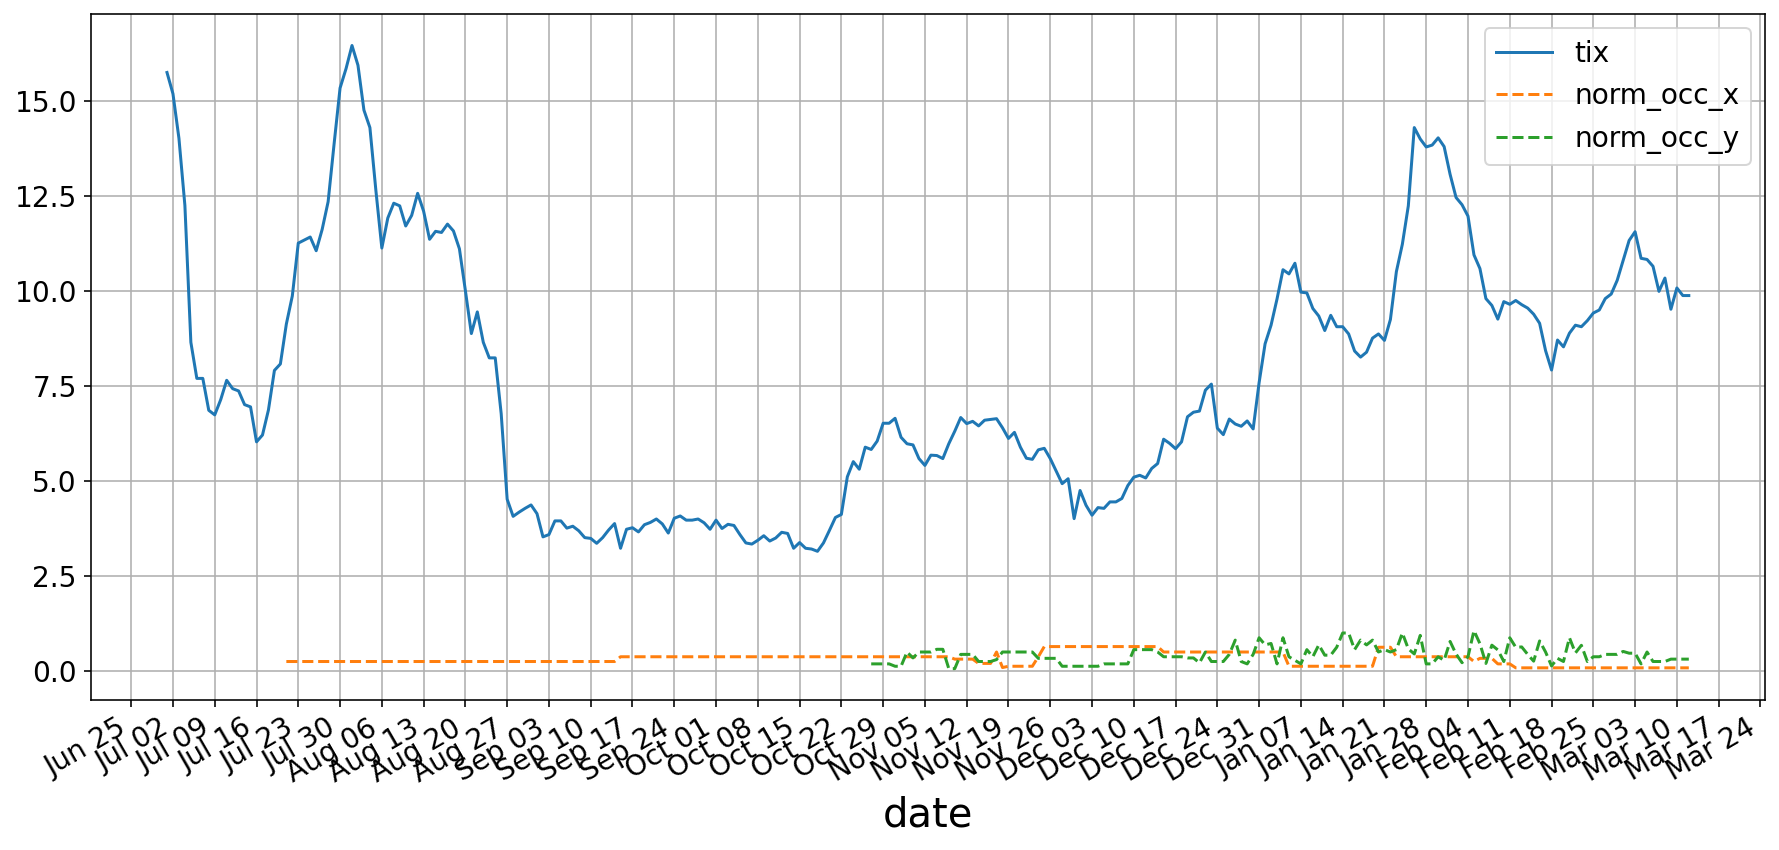

In [97]:
show_raw_and_prices(time_series)

In [98]:
time_series = time_series[['tix', 'norm_occ_x', 'norm_occ_y']].fillna(0)

In [99]:
time_series['norm_occ_x_mean'] = time_series['norm_occ_x'].rolling(window=4).mean().bfill()
time_series['norm_occ_y_mean'] = time_series['norm_occ_y'].rolling(window=4).mean().bfill()
time_series['tix_mean'] = time_series['tix'].rolling(window=4).mean().bfill()

In [100]:
from pandas.plotting import lag_plot

import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd

plt.ion()

mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 14


In [101]:
time_series['d_tix'] = time_series['tix'].diff()

In [102]:
time_series

,tix,norm_occ_x,norm_occ_y,norm_occ_x_mean,norm_occ_y_mean,tix_mean,d_tix
date,,,,,,,
2019-07-01,15.75,0.000000,0.0000,0.000000,0.000000,14.3025,NaN
2019-07-02,15.19,0.000000,0.0000,0.000000,0.000000,14.3025,-0.56
2019-07-03,14.02,0.000000,0.0000,0.000000,0.000000,14.3025,-1.17
2019-07-04,12.25,0.000000,0.0000,0.000000,0.000000,14.3025,-1.77
2019-07-05,8.65,0.000000,0.0000,0.000000,0.000000,12.5275,-3.60
...,...,...,...,...,...,...,...
2020-03-08,10.34,0.083333,0.2500,0.083333,0.312500,10.4525,0.35
2020-03-09,9.52,0.083333,0.3125,0.083333,0.265625,10.1250,-0.82
2020-03-10,10.08,0.083333,0.3125,0.083333,0.281250,9.9825,0.56


In [103]:
from sklearn.base import BaseEstimator, TransformerMixin

class Horizonizer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=[], windows=[], drop_t0=True):
        self.windows = windows
        self.columns = columns
        self.drop_t0 = drop_t0
        assert len(columns) == len(windows), 'windows and columns are not same length'
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):

            
        for c in range(len(self.columns)):
            subdf_cols = []
            series = X[self.columns[c]]
            for i in range(self.windows[c]):
                subdf_cols.append(self.columns[c] + '_t-' + str(i))

            subdf = pd.DataFrame(columns = subdf_cols)
            
            for i in range(len(series)):
                if i < self.windows[c]:
                    subdf.loc[i] = [series[i-j] for j in range(i+1)] + [None for k in range(1, self.windows[c]-i)]
                else:
                    subdf.loc[i] = [series[i-j] for j in range(self.windows[c])]
                    
            if len(X.index) > 0:
                subdf.set_index(X.index, inplace=True)
            
            if self.drop_t0:
                subdf = subdf.drop(self.columns[c] + '_t-' + str(0), axis=1)
                X = X.drop(self.columns[c], axis=1)
            X = pd.concat([X, subdf], axis=1)
            
        return X

In [104]:
horizon_pipeline = Horizonizer( columns=['d_tix'], windows=[5])
df = horizon_pipeline.transform(time_series).bfill()
from sklearn.linear_model import LinearRegression

In [149]:
from datetime import timedelta
from datetime import datetime
class Forcaster(BaseEstimator, TransformerMixin):
    def __init__(self, forcast_len=14, method=LinearRegression):
        self.forcast_len = forcast_len
        self.method = method
        self.forcast_models = []
        
    def fit(self, X, y=None):
        self.y = y.copy()
        for i in range(self.forcast_len):
            lin_reg = self.method()
            lin_reg.fit(X,y.shift(-1*i).fillna(method='ffill'))
            self.forcast_models.append(lin_reg)
        return self
    
    def transform(self, X):
        return X
        
    def forcast(self, X, start=date(2020,3,10), forcast_col='t+0'):
        columns =['forcast']
        for m in range(len(self.forcast_models)):
            columns.append('t+' + str(m))
        
        forcast_y = pd.DataFrame(columns=columns)
        
        for i in range(X.shape[0]):
            predictions = [None]
            #print(X.iloc[i])
            
            for model in self.forcast_models:
                predictions.append(model.predict(X.iloc[i].values.reshape(1,-1))[0])
            forcast_y.loc[i] = predictions
        
        forcast_y.set_index(X.index, inplace=True)
        
        index = pd.date_range(pd.to_datetime(forcast_y.iloc[[-1]].index).date[0], periods=28, freq='D')
        
        forcast_y = pd.concat([forcast_y, pd.DataFrame(index=index.date)])
        
        for i, row in forcast_y.iterrows():
            forcast_y.at[i,'forcast'] = forcast_y.at[i, forcast_col]
            if i > start:
                for j in range(len(self.forcast_models)):
                    date_index = i + timedelta(days=j)
                    forcast_y.at[date_index,'forcast'] = forcast_y.at[date_index, 't+'+str(j)]
                        
                break
        
        plt.plot(forcast_y['forcast'])
        plt.axvline(x=start, linestyle='--', color='k')
        plt.grid()
        return(forcast_y)

,forcast,t+0,t+1,t+2,t+3,t+4,t+5,t+6,t+7,t+8,...,t+18,t+19,t+20,t+21,t+22,t+23,t+24,t+25,t+26,t+27
2019-07-01,13.702317,13.702317,13.172788,12.657009,12.176480,11.742317,11.456156,11.191812,10.918342,10.702653,...,9.712029,9.655403,9.633390,9.592185,9.552171,9.483138,9.415472,9.354757,9.319012,9.234660
2019-07-02,13.702317,13.702317,13.172788,12.657009,12.176480,11.742317,11.456156,11.191812,10.918342,10.702653,...,9.712029,9.655403,9.633390,9.592185,9.552171,9.483138,9.415472,9.354757,9.319012,9.234660
2019-07-03,13.702317,13.702317,13.172788,12.657009,12.176480,11.742317,11.456156,11.191812,10.918342,10.702653,...,9.712029,9.655403,9.633390,9.592185,9.552171,9.483138,9.415472,9.354757,9.319012,9.234660
2019-07-04,13.216329,13.216329,12.606041,12.002814,11.468386,11.083390,10.831845,10.584787,10.279157,10.064014,...,9.375194,9.345192,9.252484,9.223971,9.219955,9.231834,9.225160,9.260953,9.333210,9.305030
2019-07-05,10.839087,10.839087,10.161765,9.525901,9.084059,8.841686,8.681926,8.464571,8.208194,8.036996,...,8.471516,8.429038,8.344328,8.407891,8.552986,8.712686,8.876131,9.111204,9.321651,9.385659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


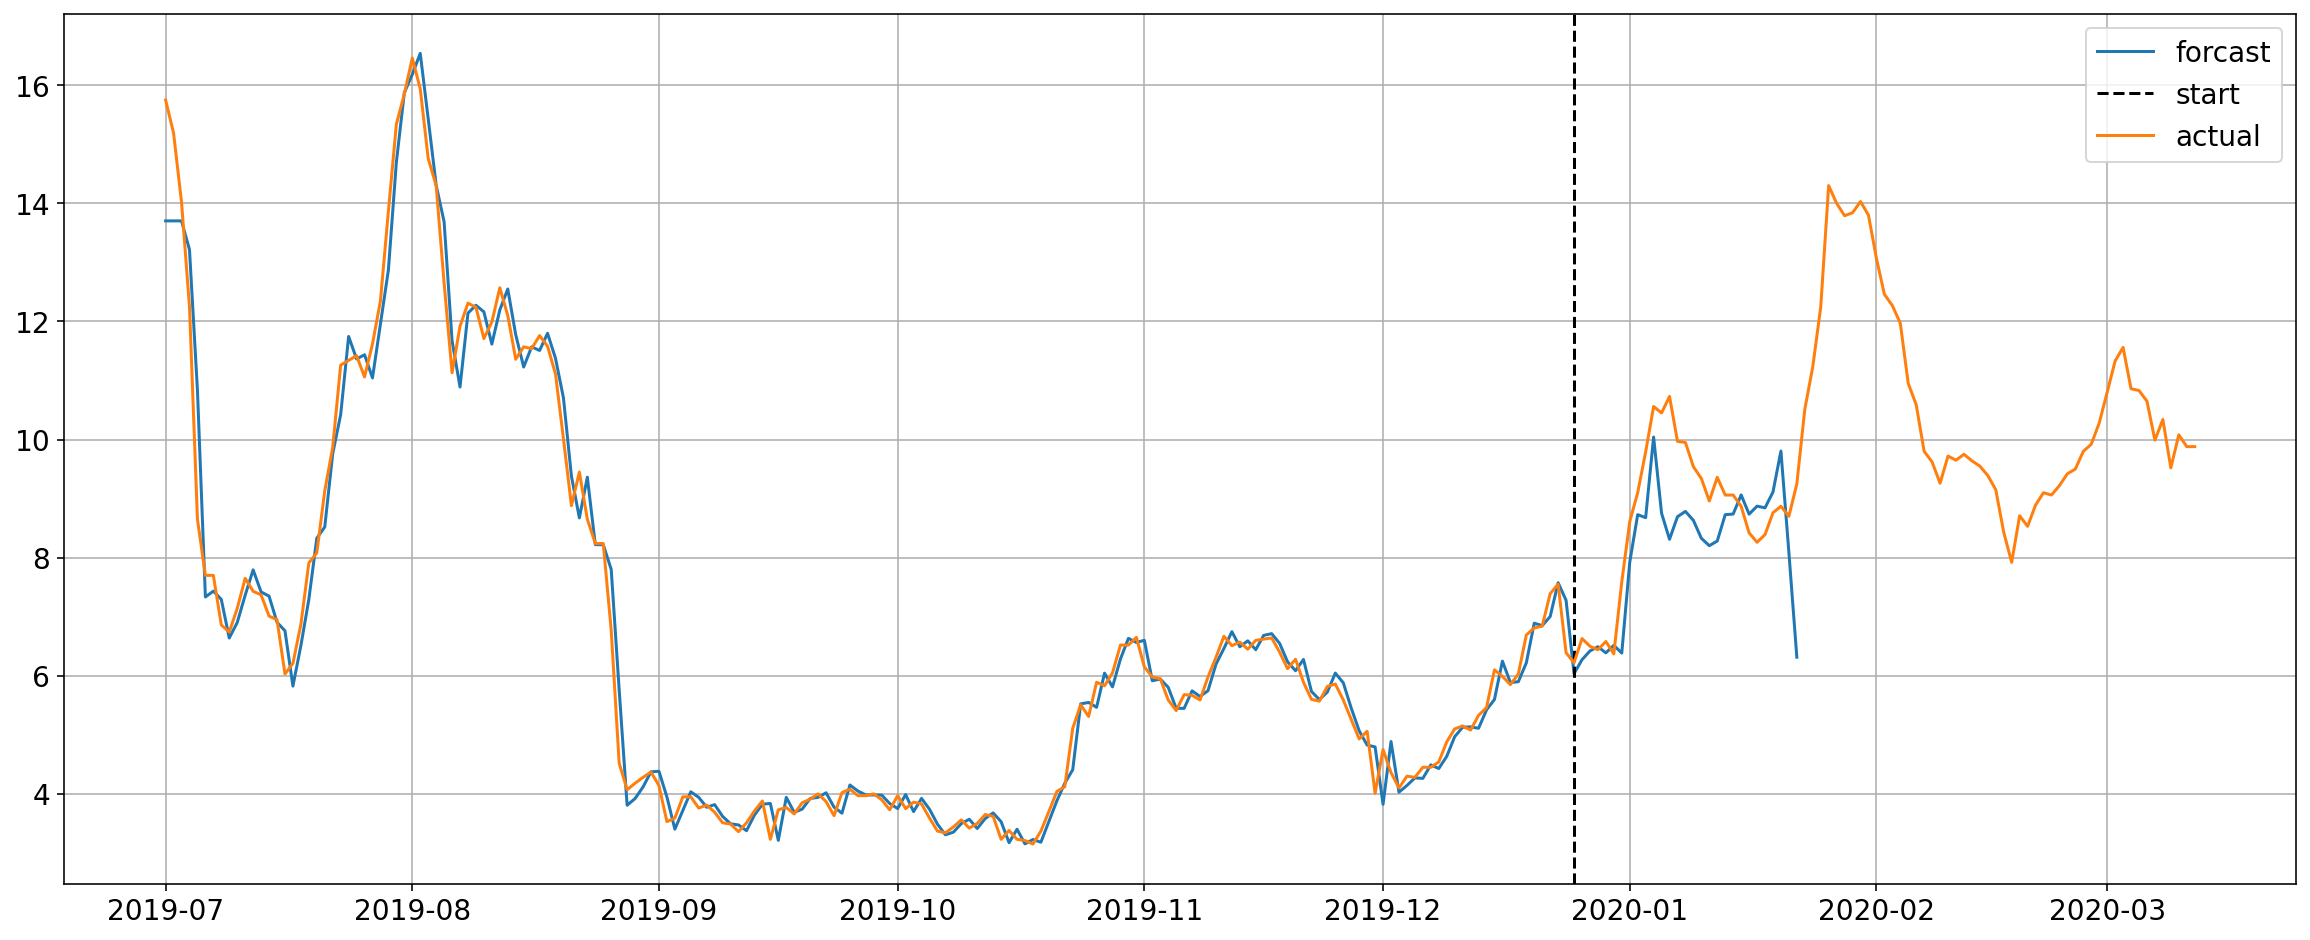

In [165]:
from datetime import date
X, y = df.copy().drop('tix', axis=1), df['tix']

forcaster = Forcaster(forcast_len=28)
start_idx = date(2019,12,25)
forcaster.fit(X[:start_idx],y[:start_idx])

preds = forcaster.forcast(X, start=start_idx)
plt.plot(y)
plt.legend(['forcast',
            'start',
            'actual']);
preds[:date(2020, 3,25)]

In [157]:
preds.loc[date(2020, 2, 25)]

forcast     9.335668
t+0         9.335668
t+1         9.349179
t+2         9.366653
t+3         9.416311
t+4         9.475137
t+5         9.574282
t+6         9.696746
t+7         9.871280
t+8         9.998613
t+9        10.088220
t+10       10.179718
t+11       10.250241
t+12       10.324479
t+13       10.409966
t+14       10.477644
t+15       10.540562
t+16       10.602902
t+17       10.695553
t+18       10.682436
t+19       10.623119
t+20       10.547738
t+21       10.452694
t+22       10.322861
t+23       10.187346
t+24       10.093538
t+25        9.987517
t+26        9.849254
t+27        9.781980
Name: 2020-02-25, dtype: float64